------------------------------------------------------------------------------------------------------------------------------------

# This Example shows how to use advanced postprocessing functions to create plots using MatPlotLib without opening HFSS UI 
-------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys
import os
import pathlib
import shutil
import time
local_path = os.path.abspath('')
module_path = pathlib.Path(local_path)
root_path = module_path.parent
root_path2 = root_path.parent
root_path3 = root_path2.parent
path1=os.path.join(root_path2)
path2=os.path.join(root_path3)
sys.path.append(path1)
sys.path.append(path2)
example_path =os.path.join(module_path.parent,"Examples_Files")


In [1]:
from pyaedt.core import Desktop
from pyaedt.core import Hfss
from pyaedt.core.generic.general_methods import generate_unique_name
project_dir = os.path.join(os.environ["TEMP"], generate_unique_name("Example"))
if not os.path.exists(project_dir): os.makedirs(project_dir)
print(project_dir)

In [2]:
%matplotlib inline

## Importing all the module for postprocessing

In [3]:
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## Setting up Desktop and initializing it
Desktop is launched in Non-Graphical Mode

In [4]:
desktopVersion = "2021.1"
oDesktop = None
NonGraphical = True
NewThread = False
desktop = Desktop(desktopVersion, NonGraphical, NewThread )

Info: Using Windows TaskManager to Load processes
Info: Ansoft.ElectronicsDesktop.2021.1 Started with Process ID 258364
Info: pyaedt v1.5.25 started
Info: Started external COM connection with module pythonnet_v3
Info: Python version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Info: Exe path: C:\Anaconda3\python.exe


## Initializing the project
The project is copied in temp folder and then loaded

In [5]:
project_file = "FiniteArray_Radome_77GHz_3D_CADDM.aedt"
project_path = os.path.join(project_dir, project_file)
    

'C:\\Temp\\FiniteArray_Radome_77GHz_3D_CADDM.aedt'

## Copy the projec to temp dir

In [7]:
shutil.copy2(os.path.join(example_path,project_file), project_path)                           


'C:\\Temp\\FiniteArray_Radome_77GHz_3D_CADDM.aedt'

## HFSS Open the project

In [8]:
#hfss = HFSS(designname="4X4_MultiCell_CA-Array")

hfss = Hfss(project_path, "4X4_MultiCell_CA-Array")

Info: Design Loaded
Info: Successfully loaded project materials !
Info: Materials Loaded


# Solve HFSS Project. Solution time is computed

In [9]:
start = time.time()
hfss.analyze_setup("Setup1")
end = time.time() - start
print("Solution Time", end)

Info: Solving design setup Setup1
Solution Time 564.7701463699341


##  Get EFields from Solution

In [10]:
start = time.time()
ff_data = hfss.post.get_efields_data(ff_setup="3D")
end = time.time() - start
print("Post Processing Time", end)

Post Processing Time 213.58267068862915


Function to Calculate Far Field Values

This function generated the plot using matplotlib by reading the solution generated in ff_data and processing the field based on Phi and Theta

(16+0j)


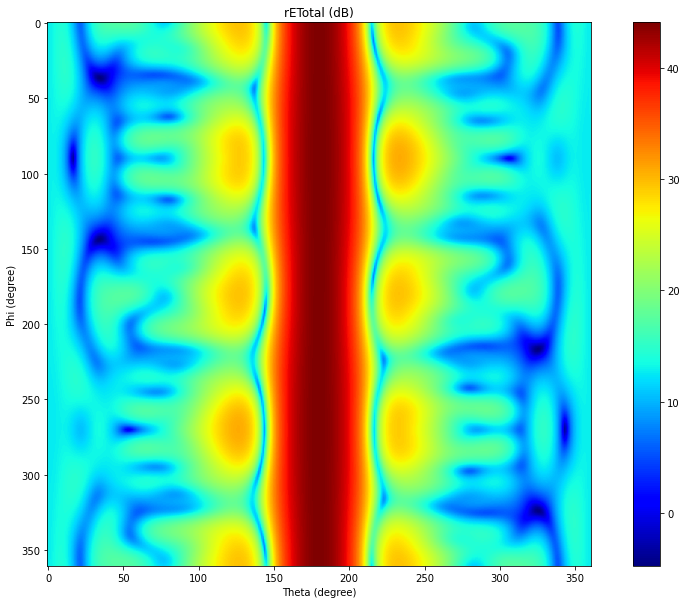

In [11]:
hfss.post.far_field_plot(ff_data)
  

In [12]:
def interact_ff(x,y):
    hfss.post.far_field_plot(ff_data,x,y)

#  Create the plot and interact with it

In [13]:
interact(interact_ff, x = widgets.FloatSlider(value=0, min=-180, max=180,step=1),
         y= widgets.FloatSlider(value=0, min=-180, max=180,step=1))

interactive(children=(FloatSlider(value=0.0, description='x', max=180.0, min=-180.0, step=1.0), FloatSlider(va…

<function __main__.interact_ff(x, y)>

In [14]:
vals = hfss.post.get_far_field_data(setup_sweep_name=hfss.nominal_sweep, expression="RealizedGainTotal", domain="Elevation")

In [15]:
def Polar_Plot(Phase=0, Freq=76):
    """
    id=0
    """   
    ax = plt.subplot(111, projection='polar')
    legend=[]
    Phase = int(Phase)
    Freq = int(Freq)
    f_list=[Freq]
    p_list=[Phase]
    if Freq == 75:
        f_list = vals.sweeps["Freq"]
    if Phase == -90:
        p_list = vals.sweeps["Phi"]
    for i in f_list:
        for j in p_list:
            vals.nominal_sweeps["Phi"] = j
            vals.nominal_sweeps["Freq"] = i
            theta = np.array(vals.to_degrees(vals.sweeps["Theta"]))
            r = np.array(vals.data_db())
            ax.plot(theta, r)
            ax.grid(True)
            ax.set_theta_zero_location("N")
            ax.set_theta_direction(-1)
            legend.append("Phi:"+str(vals.nominal_sweeps["Phi"])+" Freq:"+str(round(vals.nominal_sweeps["Freq"]))+"GHz")
    ax.legend(legend)
    ax.set_title("Realized Gain Total", va='bottom')
    fig = plt.gcf()
    fig.set_size_inches(10,10)

In [16]:
interact(Polar_Plot, Phase = widgets.FloatSlider(value=0, min=-90, max=90,step=90), Freq = widgets.FloatSlider(value=76, min=75, max=77,step=1))

interactive(children=(FloatSlider(value=0.0, description='Phase', max=90.0, min=-90.0, step=90.0), FloatSlider…

<function __main__.Polar_Plot(Phase=0, Freq=76)>

# Generation of Plot Using Phi as primary sweep

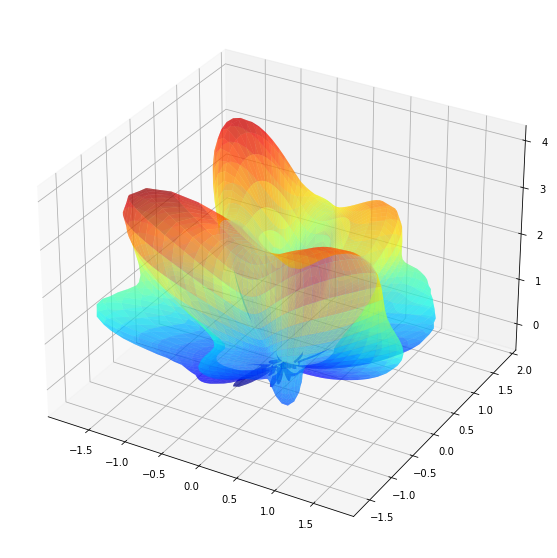

In [17]:
vals3d = hfss.post.get_far_field_data(setup_sweep_name=hfss.nominal_sweep, expression="RealizedGainTotal", domain="Infinite Sphere1")

hfss.post.create_3d_plot(vals3d,nominal_sweep="Freq", nominal_value=76)

In [18]:
def interact_3d(F=76):
    hfss.post.create_3d_plot(vals3d,nominal_sweep="Freq", nominal_value=F)

In [19]:
interact(interact_3d, F=widgets.FloatSlider(value=76, min=76, max=77,step=1))

interactive(children=(FloatSlider(value=76.0, description='F', max=77.0, min=76.0, step=1.0), Output()), _dom_…

<function __main__.interact_3d(F=76)>

# Close Desktop

In [20]:
hfss.close_project(project_file[:-5])
desktop.force_close_desktop()

Info: Closing the specified FiniteArray_Radome_77GHz_3D_CADDM AEDT Project
